### 1. Start the Environment

In [1]:
import numpy as np
from collections import defaultdict
import random
# !pip3 install git+https://github.com/slremy/netsapi --user --upgrade
from netsapi.challenge import * 

In [2]:
env = ChallengeSeqDecEnvironment(experimentCount=1050000)

### 2. Examine the State and Action Spaces

In [3]:
num_agents=1
states = env.state
states = np.array([states]).reshape(1, 1)
state_size = states.shape[1]
action_size = 2

In [4]:
print('Size of each action:', action_size)
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states)

Size of each action: 2
There are 1 agents. Each observes a state with length: 1
The state for the first agent looks like: [[1]]


### 3. Take Random Actions in the Environment

In [5]:
env.reset()     # reset the environment    
states = np.array([env.state]).reshape(1, 1) # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, 0, 1)                  # all actions between -1 and 1
    print(actions)
 
    next_states, reward, done, _ = env.evaluateAction(actions[0])           # send all actions to tne environment
    scores += reward                        # update the score (for each agent)
    print("reward=",reward)
    states = next_states                              # roll over states to next time step
    if np.any(done): 
        print(done)
        # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

[[0.         0.46154226]]
1050000  Evaluations Remaining
reward= 24.778090451075105
[[0.24169257 0.        ]]
1049999  Evaluations Remaining
reward= 0.9650818731952384
[[0. 1.]]
1049998  Evaluations Remaining
reward= 108.08112018943143
[[0.         0.73162052]]
1049997  Evaluations Remaining
reward= -0.2270319713438118
[[0.28312755 0.01642971]]
1049996  Evaluations Remaining
reward= 0.4495587132962693
True
Total score (averaged over agents) this episode: 134.0468192556542


In [6]:
env.reset()     # reset the environment    
i = 0
policies = []
policy = {}
while True:
    
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, 0, 1)                  # all actions between -1 and 1
    i +=1
    next_states, reward, done, _ = env.evaluateAction(actions[0])           # send all actions to tne environment
    policy[str(i)]=list(actions[0])
    policies.append(policy)
    if done: 
        break
    
print(policies)
reward = env.evaluatePolicy(policies)            
print('results=',reward)
print('sum(results)=',sum(reward))

1049995  Evaluations Remaining
1049994  Evaluations Remaining
1049993  Evaluations Remaining
1049992  Evaluations Remaining
1049991  Evaluations Remaining
[{'1': [0.0, 0.4402395388825513], '2': [0.21141550547941215, 0.0], '3': [1.0, 0.0], '4': [0.0, 0.10152020954400577], '5': [0.0, 1.0]}, {'1': [0.0, 0.4402395388825513], '2': [0.21141550547941215, 0.0], '3': [1.0, 0.0], '4': [0.0, 0.10152020954400577], '5': [0.0, 1.0]}, {'1': [0.0, 0.4402395388825513], '2': [0.21141550547941215, 0.0], '3': [1.0, 0.0], '4': [0.0, 0.10152020954400577], '5': [0.0, 1.0]}, {'1': [0.0, 0.4402395388825513], '2': [0.21141550547941215, 0.0], '3': [1.0, 0.0], '4': [0.0, 0.10152020954400577], '5': [0.0, 1.0]}, {'1': [0.0, 0.4402395388825513], '2': [0.21141550547941215, 0.0], '3': [1.0, 0.0], '4': [0.0, 0.10152020954400577], '5': [0.0, 1.0]}]
1049990  Evaluations Remaining
results= [196.4702989972896, 188.40411200703286, 191.16737059899918, 194.47313287043667, 194.70705258166333]
sum(results)= 965.2219670554216


In [7]:
actions = np.random.randn(1, 2)

### 4. Take Actions with DDPG

In [8]:
a = np.random.randn(num_agents, action_size) 
a[0]

array([-0.1663044 , -1.49098913])

In [9]:
np.append(a[0],[4])

array([-0.1663044 , -1.49098913,  4.        ])

In [10]:
import torch
from collections import deque
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def ddpg(n_episodes=200, max_t=15,target_score=600):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=10)
    scores = np.zeros(num_agents)
    scores_episode = []
    state_size=3
    agent = Agent(state_size, action_size, random_seed=0)
    epsilon=0.5

    for i_episode in range(1, n_episodes+1):
        epsilon = 0.99*epsilon
        agent.reset()
        env.reset() 
        scores = np.zeros(num_agents) 
        next_states = np.array([0,0,0]).reshape(1,3)
        for t in range(max_t):
            states = next_states
            actions = np.array(agent.act(states),dtype="float64")
            if epsilon > random.random() :
                actions = np.random.randn(num_agents, action_size)    
            actions = np.clip(actions, 0, 1)
            print("\n actions=",actions)
#             print("actions1=",actions1)
            next_states, rewards, dones, _ = env.evaluateAction(actions[0])  # send the action to the environment  
            print("rewards=",rewards)
            next_states = np.append(actions[0],[rewards]).reshape(1, 3)
            agent.step(t,states, actions, rewards, next_states, dones) 
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if dones:
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)
        epsilon = epsilon*0.99
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=target_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'models/arm_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'models/arm_critic.pth')
            break
            
    return scores_episode

scores = ddpg()

Initialising ReplayBuffer

 actions= [[0. 0.]]
1049965  Evaluations Remaining
rewards= 2.60878478422339

 actions= [[0. 0.]]
1049964  Evaluations Remaining
rewards= 0.1321420012646235
Timestep 1	Score: 2.74	min: 2.74	max: 2.74
 actions= [[1. 0.]]
1049963  Evaluations Remaining
rewards= 86.98250898996157
Timestep 2	Score: 89.72	min: 89.72	max: 89.72
 actions= [[0.4385173  0.40092149]]
1049962  Evaluations Remaining
rewards= 14.217400251450165
Timestep 3	Score: 103.94	min: 103.94	max: 103.94
 actions= [[0.43824422 0.5172857 ]]
1049961  Evaluations Remaining
rewards= -5.352043727134145
Episode 1	Score: 98.59	Average Score: 98.5959

 actions= [[0.09617476 0.21222468]]
1049960  Evaluations Remaining
rewards= 16.459587701767866

 actions= [[0. 0.]]
1049959  Evaluations Remaining
rewards= 0.023316145599379556
Timestep 1	Score: 16.48	min: 16.48	max: 16.48
 actions= [[0.36597833 0.49485904]]
1049958  Evaluations Remaining
rewards= 28.39431974751288
Timestep 2	Score: 44.88	min: 44.88	max: 44.88


rewards= 0.22931963374970232
Timestep 3	Score: 9.03	min: 9.03	max: 9.03
 actions= [[0.37548211 0.39606211]]
1049901  Evaluations Remaining
rewards= 12.86434915198748
Episode 13	Score: 21.90	Average Score: -5.950

 actions= [[0.12652691 0.17064135]]
1049900  Evaluations Remaining
rewards= 13.213112469262143

 actions= [[0.25020206 0.15487337]]
1049899  Evaluations Remaining
rewards= -38.48699720810298
Timestep 1	Score: -25.27	min: -25.27	max: -25.27
 actions= [[0.2669062  0.17072126]]
1049898  Evaluations Remaining
rewards= -34.20647860256117
Timestep 2	Score: -59.48	min: -59.48	max: -59.48
 actions= [[0.33076802 0.26172411]]
1049897  Evaluations Remaining
rewards= -42.8052122951351
Timestep 3	Score: -102.29	min: -102.29	max: -102.29
 actions= [[0.36759443 0.        ]]
1049896  Evaluations Remaining
rewards= 1.2300204945854052
Episode 14	Score: -101.06	Average Score: -18.591.06

 actions= [[0.13945195 0.1920846 ]]
1049895  Evaluations Remaining
rewards= 5.715151979316203

 actions= [[0.

rewards= 51.18739523012359
Timestep 1	Score: 146.98	min: 146.98	max: 146.98
 actions= [[0.29745486 0.35201165]]
1049838  Evaluations Remaining
rewards= -10.177779905654726
Timestep 2	Score: 136.80	min: 136.80	max: 136.80
 actions= [[0.37040117 0.45549741]]
1049837  Evaluations Remaining
rewards= -11.256100070820507
Timestep 3	Score: 125.54	min: 125.54	max: 125.54
 actions= [[0.47303054 0.58977425]]
1049836  Evaluations Remaining
rewards= -1.3870852948604009
Episode 26	Score: 124.16	Average Score: -8.90.16

 actions= [[0.22722964 0.0714964 ]]
1049835  Evaluations Remaining
rewards= -19.03560158374707

 actions= [[0.35167247 0.1857055 ]]
1049834  Evaluations Remaining
rewards= -89.02865331622569
Timestep 1	Score: -108.06	min: -108.06	max: -108.06
 actions= [[0.61902672 0.16349812]]
1049833  Evaluations Remaining
rewards= -44.738124988602905
Timestep 2	Score: -152.80	min: -152.80	max: -152.80
 actions= [[0.64861608 0.24548735]]
1049832  Evaluations Remaining
rewards= -54.74845130968245
Ti

rewards= 0.23030516561277414
Timestep 1	Score: 14.81	min: 14.81	max: 14.81
 actions= [[1. 1.]]
1049773  Evaluations Remaining
rewards= -0.07769751248751877
Timestep 2	Score: 14.73	min: 14.73	max: 14.73
 actions= [[1. 1.]]
1049772  Evaluations Remaining
rewards= 0.19824318469427293
Timestep 3	Score: 14.93	min: 14.93	max: 14.93
 actions= [[1. 1.]]
1049771  Evaluations Remaining
rewards= -0.12314560552191045
Episode 39	Score: 14.81	Average Score: 43.801

 actions= [[1. 1.]]
1049770  Evaluations Remaining
rewards= 14.289113541442305

 actions= [[1. 1.]]
1049769  Evaluations Remaining
rewards= -0.20249386939122527
Timestep 1	Score: 14.09	min: 14.09	max: 14.09
 actions= [[1. 1.]]
1049768  Evaluations Remaining
rewards= 0.1951775937013629
Timestep 2	Score: 14.28	min: 14.28	max: 14.28
 actions= [[1. 1.]]
1049767  Evaluations Remaining
rewards= 0.07667918449819977
Timestep 3	Score: 14.36	min: 14.36	max: 14.36
 actions= [[0.54631629 0.2667426 ]]
1049766  Evaluations Remaining
rewards= 0.08191162

rewards= -59.266640115196104

 actions= [[1. 1.]]
1049704  Evaluations Remaining
rewards= 43.529965047461694
Timestep 1	Score: -15.74	min: -15.74	max: -15.74
 actions= [[1. 1.]]
1049703  Evaluations Remaining
rewards= -0.23731311460405724
Timestep 2	Score: -15.97	min: -15.97	max: -15.97
 actions= [[0. 0.]]
1049702  Evaluations Remaining
rewards= 0.1891061601233366
Timestep 3	Score: -15.78	min: -15.78	max: -15.78
 actions= [[1. 1.]]
1049701  Evaluations Remaining
rewards= 11.370467582186826
Episode 53	Score: -4.41	Average Score: 58.531

 actions= [[1. 1.]]
1049700  Evaluations Remaining
rewards= 16.2622224987173

 actions= [[1. 1.]]
1049699  Evaluations Remaining
rewards= 0.13983488644335074
Timestep 1	Score: 16.40	min: 16.40	max: 16.40
 actions= [[0. 0.]]
1049698  Evaluations Remaining
rewards= 0.2655825461902719
Timestep 2	Score: 16.67	min: 16.67	max: 16.67
 actions= [[1. 1.]]
1049697  Evaluations Remaining
rewards= 10.843800004251943
Timestep 3	Score: 27.51	min: 27.51	max: 27.51
 act

rewards= 0.20130842051144304
Episode 66	Score: 39.34	Average Score: 39.014

 actions= [[1. 1.]]
1049635  Evaluations Remaining
rewards= 15.991607163866972

 actions= [[1. 1.]]
1049634  Evaluations Remaining
rewards= -0.16889190773039298
Timestep 1	Score: 15.82	min: 15.82	max: 15.82
 actions= [[0. 0.]]
1049633  Evaluations Remaining
rewards= 0.12149180190154718
Timestep 2	Score: 15.94	min: 15.94	max: 15.94
 actions= [[1. 1.]]
1049632  Evaluations Remaining
rewards= 12.589798840189891
Timestep 3	Score: 28.53	min: 28.53	max: 28.53
 actions= [[1. 1.]]
1049631  Evaluations Remaining
rewards= 0.11033516333528404
Episode 67	Score: 28.64	Average Score: 37.094

 actions= [[1. 1.]]
1049630  Evaluations Remaining
rewards= 15.757520135498876

 actions= [[0.         0.92606324]]
1049629  Evaluations Remaining
rewards= -0.19670715653324766
Timestep 1	Score: 15.56	min: 15.56	max: 15.56
 actions= [[1. 1.]]
1049628  Evaluations Remaining
rewards= 44.18142786209143
Timestep 2	Score: 59.74	min: 59.74	max

rewards= 0.08004766484834569
Episode 80	Score: 14.40	Average Score: 26.760

 actions= [[0.16886895 0.        ]]
1049565  Evaluations Remaining
rewards= 2.681516698637265

 actions= [[1. 1.]]
1049564  Evaluations Remaining
rewards= 4.153377980981684
Timestep 1	Score: 6.83	min: 6.83	max: 6.83
 actions= [[1. 1.]]
1049563  Evaluations Remaining
rewards= 0.23525969534830526
Timestep 2	Score: 7.07	min: 7.07	max: 7.07
 actions= [[1. 1.]]
1049562  Evaluations Remaining
rewards= -0.06152960682656028
Timestep 3	Score: 7.01	min: 7.01	max: 7.01
 actions= [[0. 0.]]
1049561  Evaluations Remaining
rewards= 0.1613084423568818
Episode 81	Score: 7.17	Average Score: 24.81

 actions= [[1. 1.]]
1049560  Evaluations Remaining
rewards= 13.682740103053614

 actions= [[1. 1.]]
1049559  Evaluations Remaining
rewards= -0.09970713888733496
Timestep 1	Score: 13.58	min: 13.58	max: 13.58
 actions= [[1. 1.]]
1049558  Evaluations Remaining
rewards= -0.21271409311202794
Timestep 2	Score: 13.37	min: 13.37	max: 13.37
 ac

rewards= -0.15459451587267958
Episode 94	Score: 14.41	Average Score: 16.131

 actions= [[1. 1.]]
1049495  Evaluations Remaining
rewards= 15.779009057943787

 actions= [[1. 1.]]
1049494  Evaluations Remaining
rewards= -0.2671468748974588
Timestep 1	Score: 15.51	min: 15.51	max: 15.51
 actions= [[0.         0.42391595]]
1049493  Evaluations Remaining
rewards= -0.1989956660116703
Timestep 2	Score: 15.31	min: 15.31	max: 15.31
 actions= [[1. 1.]]
1049492  Evaluations Remaining
rewards= 26.92004942806731
Timestep 3	Score: 42.23	min: 42.23	max: 42.23
 actions= [[1. 1.]]
1049491  Evaluations Remaining
rewards= 0.13781752829644534
Episode 95	Score: 42.37	Average Score: 18.837

 actions= [[1. 1.]]
1049490  Evaluations Remaining
rewards= 16.123289516089574

 actions= [[1. 1.]]
1049489  Evaluations Remaining
rewards= -0.024954038928810096
Timestep 1	Score: 16.10	min: 16.10	max: 16.10
 actions= [[1. 1.]]
1049488  Evaluations Remaining
rewards= 0.05876935709048903
Timestep 2	Score: 16.16	min: 16.16	m

rewards= -0.07622610546689046
Episode 108	Score: 14.75	Average Score: 19.35

 actions= [[1. 1.]]
1049425  Evaluations Remaining
rewards= 15.895804675915027

 actions= [[1. 1.]]
1049424  Evaluations Remaining
rewards= -0.11420738478169978
Timestep 1	Score: 15.78	min: 15.78	max: 15.78
 actions= [[1. 1.]]
1049423  Evaluations Remaining
rewards= -0.23079051288378283
Timestep 2	Score: 15.55	min: 15.55	max: 15.55
 actions= [[1. 1.]]
1049422  Evaluations Remaining
rewards= 0.1729166504856532
Timestep 3	Score: 15.72	min: 15.72	max: 15.72
 actions= [[1. 1.]]
1049421  Evaluations Remaining
rewards= 0.21462227341918094
Episode 109	Score: 15.94	Average Score: 19.33

 actions= [[1. 1.]]
1049420  Evaluations Remaining
rewards= 14.75010062307674

 actions= [[1. 1.]]
1049419  Evaluations Remaining
rewards= -0.09671016164271906
Timestep 1	Score: 14.65	min: 14.65	max: 14.65
 actions= [[1. 1.]]
1049418  Evaluations Remaining
rewards= 0.2172252222210873
Timestep 2	Score: 14.87	min: 14.87	max: 14.87
 actio

rewards= 0.20385772872035846
Episode 122	Score: 14.71	Average Score: 16.77

 actions= [[1. 1.]]
1049355  Evaluations Remaining
rewards= 14.279342295621523

 actions= [[1. 1.]]
1049354  Evaluations Remaining
rewards= 0.0727501153825072
Timestep 1	Score: 14.35	min: 14.35	max: 14.35
 actions= [[1. 1.]]
1049353  Evaluations Remaining
rewards= -0.15055762720776
Timestep 2	Score: 14.20	min: 14.20	max: 14.20
 actions= [[0. 0.]]
1049352  Evaluations Remaining
rewards= 0.21726227891437144
Timestep 3	Score: 14.42	min: 14.42	max: 14.42
 actions= [[0.11949569 0.84363099]]
1049351  Evaluations Remaining
rewards= 58.42991504661667
Episode 123	Score: 72.85	Average Score: 20.35

 actions= [[1. 1.]]
1049350  Evaluations Remaining
rewards= 15.385234815835606

 actions= [[1. 1.]]
1049349  Evaluations Remaining
rewards= 0.07874039205796901
Timestep 1	Score: 15.46	min: 15.46	max: 15.46
 actions= [[1. 1.]]
1049348  Evaluations Remaining
rewards= -0.08173267929068517
Timestep 2	Score: 15.38	min: 15.38	max: 1

rewards= 0.02239772243148863
Episode 136	Score: 13.76	Average Score: 23.64

 actions= [[1. 1.]]
1049285  Evaluations Remaining
rewards= 14.899336231753114

 actions= [[1. 1.]]
1049284  Evaluations Remaining
rewards= 0.07328059699596645
Timestep 1	Score: 14.97	min: 14.97	max: 14.97
 actions= [[1. 1.]]
1049283  Evaluations Remaining
rewards= -0.09349734737414739
Timestep 2	Score: 14.88	min: 14.88	max: 14.88
 actions= [[1. 1.]]
1049282  Evaluations Remaining
rewards= 0.0182390846735494
Timestep 3	Score: 14.90	min: 14.90	max: 14.90
 actions= [[1. 1.]]
1049281  Evaluations Remaining
rewards= -0.027462375731071464
Episode 137	Score: 14.87	Average Score: 23.67

 actions= [[1. 1.]]
1049280  Evaluations Remaining
rewards= 13.568256753583295

 actions= [[1. 1.]]
1049279  Evaluations Remaining
rewards= 0.11132142652277599
Timestep 1	Score: 13.68	min: 13.68	max: 13.68
 actions= [[1. 1.]]
1049278  Evaluations Remaining
rewards= -0.23194623856691043
Timestep 2	Score: 13.45	min: 13.45	max: 13.45
 act

rewards= 12.622142450424807
Episode 150	Score: 26.66	Average Score: 18.90

 actions= [[1. 1.]]
1049215  Evaluations Remaining
rewards= 14.988146797403717

 actions= [[1. 1.]]
1049214  Evaluations Remaining
rewards= 0.23075598635543182
Timestep 1	Score: 15.22	min: 15.22	max: 15.22
 actions= [[1. 1.]]
1049213  Evaluations Remaining
rewards= -0.020321904876775765
Timestep 2	Score: 15.20	min: 15.20	max: 15.20
 actions= [[1. 1.]]
1049212  Evaluations Remaining
rewards= 0.18500128685462158
Timestep 3	Score: 15.38	min: 15.38	max: 15.38
 actions= [[1. 1.]]
1049211  Evaluations Remaining
rewards= -0.25344377454799094
Episode 151	Score: 15.13	Average Score: 18.86

 actions= [[1. 1.]]
1049210  Evaluations Remaining
rewards= 13.593339389098718

 actions= [[1. 1.]]
1049209  Evaluations Remaining
rewards= -0.018218055858774118
Timestep 1	Score: 13.58	min: 13.58	max: 13.58
 actions= [[1. 1.]]
1049208  Evaluations Remaining
rewards= -0.03373615068301472
Timestep 2	Score: 13.54	min: 13.54	max: 13.54
 a

rewards= 0.25504168677355166
Episode 164	Score: 15.23	Average Score: 17.67

 actions= [[1. 1.]]
1049145  Evaluations Remaining
rewards= 13.815264409123932

 actions= [[1. 1.]]
1049144  Evaluations Remaining
rewards= -0.18274090234612306
Timestep 1	Score: 13.63	min: 13.63	max: 13.63
 actions= [[1. 1.]]
1049143  Evaluations Remaining
rewards= 0.2531504588271978
Timestep 2	Score: 13.89	min: 13.89	max: 13.89
 actions= [[1. 1.]]
1049142  Evaluations Remaining
rewards= 0.03488176683166655
Timestep 3	Score: 13.92	min: 13.92	max: 13.92
 actions= [[1. 1.]]
1049141  Evaluations Remaining
rewards= 0.09835017093568466
Episode 165	Score: 14.02	Average Score: 17.51

 actions= [[1. 1.]]
1049140  Evaluations Remaining
rewards= 13.629427966575035

 actions= [[1. 1.]]
1049139  Evaluations Remaining
rewards= 0.022003479572031193
Timestep 1	Score: 13.65	min: 13.65	max: 13.65
 actions= [[0. 0.]]
1049138  Evaluations Remaining
rewards= 0.1538428762431332
Timestep 2	Score: 13.81	min: 13.81	max: 13.81
 action

rewards= 0.18409228564340596
Episode 178	Score: 14.36	Average Score: 14.53

 actions= [[1. 1.]]
1049075  Evaluations Remaining
rewards= 16.44430983938643

 actions= [[1. 1.]]
1049074  Evaluations Remaining
rewards= -0.09904742781319076
Timestep 1	Score: 16.35	min: 16.35	max: 16.35
 actions= [[1. 1.]]
1049073  Evaluations Remaining
rewards= -0.0725640720369678
Timestep 2	Score: 16.27	min: 16.27	max: 16.27
 actions= [[1. 1.]]
1049072  Evaluations Remaining
rewards= 0.06531213047630757
Timestep 3	Score: 16.34	min: 16.34	max: 16.34
 actions= [[1. 1.]]
1049071  Evaluations Remaining
rewards= -0.06406010574218213
Episode 179	Score: 16.27	Average Score: 14.64

 actions= [[1. 1.]]
1049070  Evaluations Remaining
rewards= 14.738120232906246

 actions= [[1. 1.]]
1049069  Evaluations Remaining
rewards= -0.21615682654747204
Timestep 1	Score: 14.52	min: 14.52	max: 14.52
 actions= [[1. 1.]]
1049068  Evaluations Remaining
rewards= 0.025404497578825236
Timestep 2	Score: 14.55	min: 14.55	max: 14.55
 act

rewards= -0.2376755857900199
Episode 192	Score: 14.50	Average Score: 15.07

 actions= [[1. 1.]]
1049005  Evaluations Remaining
rewards= 14.28187210580907

 actions= [[1. 1.]]
1049004  Evaluations Remaining
rewards= 0.17611605653176454
Timestep 1	Score: 14.46	min: 14.46	max: 14.46
 actions= [[1. 1.]]
1049003  Evaluations Remaining
rewards= -0.11536859287445722
Timestep 2	Score: 14.34	min: 14.34	max: 14.34
 actions= [[1. 1.]]
1049002  Evaluations Remaining
rewards= 0.20902223060015546
Timestep 3	Score: 14.55	min: 14.55	max: 14.55
 actions= [[1. 1.]]
1049001  Evaluations Remaining
rewards= -0.07856068716660047
Episode 193	Score: 14.47	Average Score: 14.95

 actions= [[1. 1.]]
1049000  Evaluations Remaining
rewards= 15.19056440089859

 actions= [[1. 1.]]
1048999  Evaluations Remaining
rewards= -0.19370765013893765
Timestep 1	Score: 15.00	min: 15.00	max: 15.00
 actions= [[1. 1.]]
1048998  Evaluations Remaining
rewards= 0.2701655592565477
Timestep 2	Score: 15.27	min: 15.27	max: 15.27
 action

## 5.plot the score

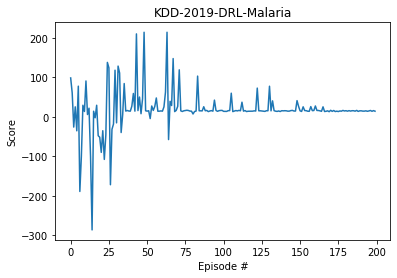

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("KDD-2019-DRL-Malaria")
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()